In [20]:
import pandas as pd #Utilizado para manipular dataframes sobre ingressantes 2022 2021
import matplotlib.pyplot as plt #Utilizado para gerar gráficos
import sys #Uso apenas para instalar geopandas
import subprocess #Uso apenas para instalar geopandas

try: #Instalação e importação automatica do geopandas
    import geopandas as gpd
except ModuleNotFoundError:
    python = sys.executable
    subprocess.check_call([python, '-m', 'pip', 'install', 'geopandas'], stdout=subprocess.DEVNULL)
    import geopandas as gpd #Utilizado para manipular dataframes geográficos, consegue interpretar dados geométricos

In [21]:
%run ./Funcoes.ipynb

DataFrames:

In [22]:
df22 = pd.read_csv('https://dados.ufpe.br/dataset/cba99924-ad97-45f6-9d1c-f4fb7a940c6f/resource/3ec70513-eca6-453d-95d1-fde1f1972a11/download/discentes-2022-ufpe.csv') 
df21 = pd.read_csv('https://dados.ufpe.br/dataset/cba99924-ad97-45f6-9d1c-f4fb7a940c6f/resource/3b4468e4-1f72-49c1-bbf3-5d71216b85e5/download/discentes-ingressos-cursos-graduacao-2021-ufpe.csv')

#Junção dos dataframes 2021 e 2022 em um só
dfall = df21.append(df22, ignore_index=True)

#Malha geográfica de Pernambuco
dfpe = gpd.read_file('DadosGeograficos/PE_Municipios_2021.shp') 

#Malha geográfica de Recife
dfrecife = gpd.read_file('http://dados.recife.pe.gov.br/dataset/c1f100f0-f56f-4dd4-9dcc-1aa4da28798a/resource/e43bee60-9448-4d3d-92ff-2378bc3b5b00/download/bairros.geojson')


Alunos por Cidade:

In [23]:
#Ajusta geodataframe com relação entre quantidade de alunos de cada cidade
#Gera string contendo relação entre numero e cidade
map_and_stats_pe=dfCidades(dfall, dfpe)
relacao = [f"{map_and_stats_pe['Indice'][x]}: {map_and_stats_pe['NM_MUN'][x]}" for x in map_and_stats_pe['Indice']]
relacao = ajusteTabela(relacao)

(-41.26665672144995,
 -34.49907329554999,
 -9.593394625949912,
 -7.162456601049958)

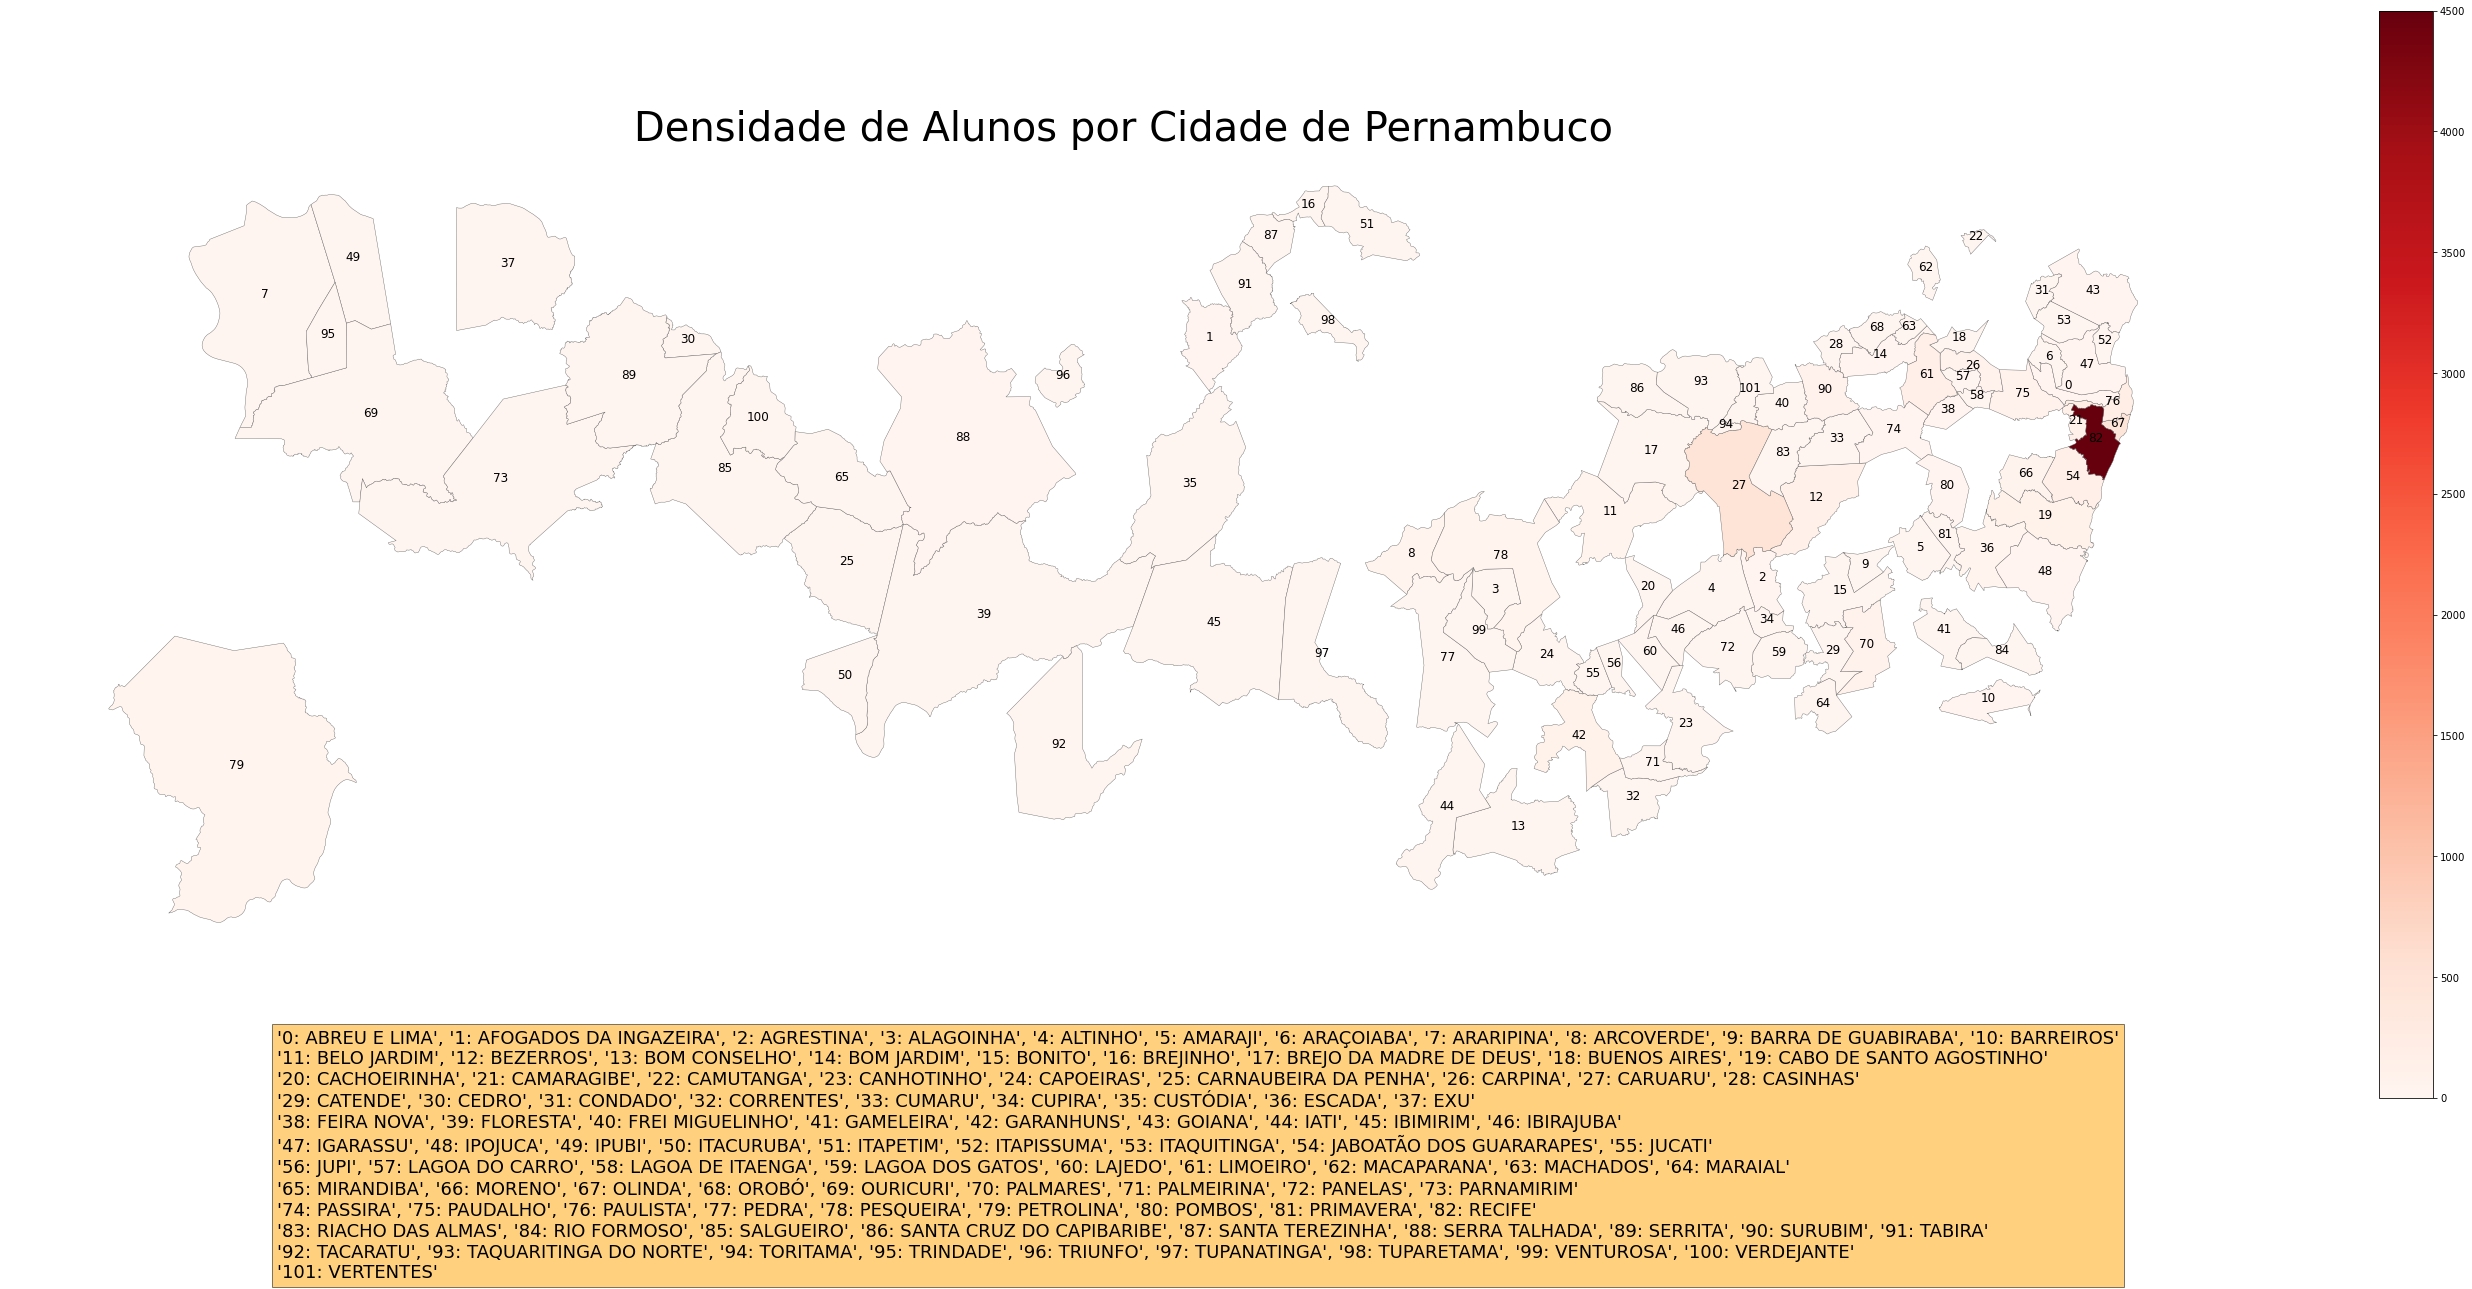

In [24]:
fig, ax = plt.subplots(1, figsize=(50, 20))
plt.xticks(rotation=90)
plt.title(label = "Densidade de Alunos por Cidade de Pernambuco",fontsize=40)
plt.figtext(0.2, 0, relacao, ha="left", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
map_and_stats_pe.plot(column="Alunos", cmap="Reds", linewidth=0.4, ax=ax, edgecolor=".4")
map_and_stats_pe.apply(lambda x: ax.annotate(text=x['Indice'], xy=x.geometry.centroid.coords[0], ha='center',fontsize=12), axis=1,)
bar_info = plt.cm.ScalarMappable(cmap="Reds", norm=plt.Normalize(vmin=0, vmax=4500))
bar_info._A = []
cbar = fig.colorbar(bar_info)
ax.axis("off")

Alunos por Bairro:

In [25]:
#Ajusta geodataframe com relação entre quantidade de alunos de cada bairro de recife
#Gera string contendo relação entre numero e bairro
map_and_stats_rec = dfBairros(dfall, dfrecife)
relacao = [f"{map_and_stats_rec['Indice'][x]}: {map_and_stats_rec['bairro_nome_ca'][x]}" for x in map_and_stats_rec['Indice']]
relacao = ajusteTabela(relacao)

(-35.02656241739515,
 -34.849511611585676,
 -8.166782392960442,
 -7.915054767400497)

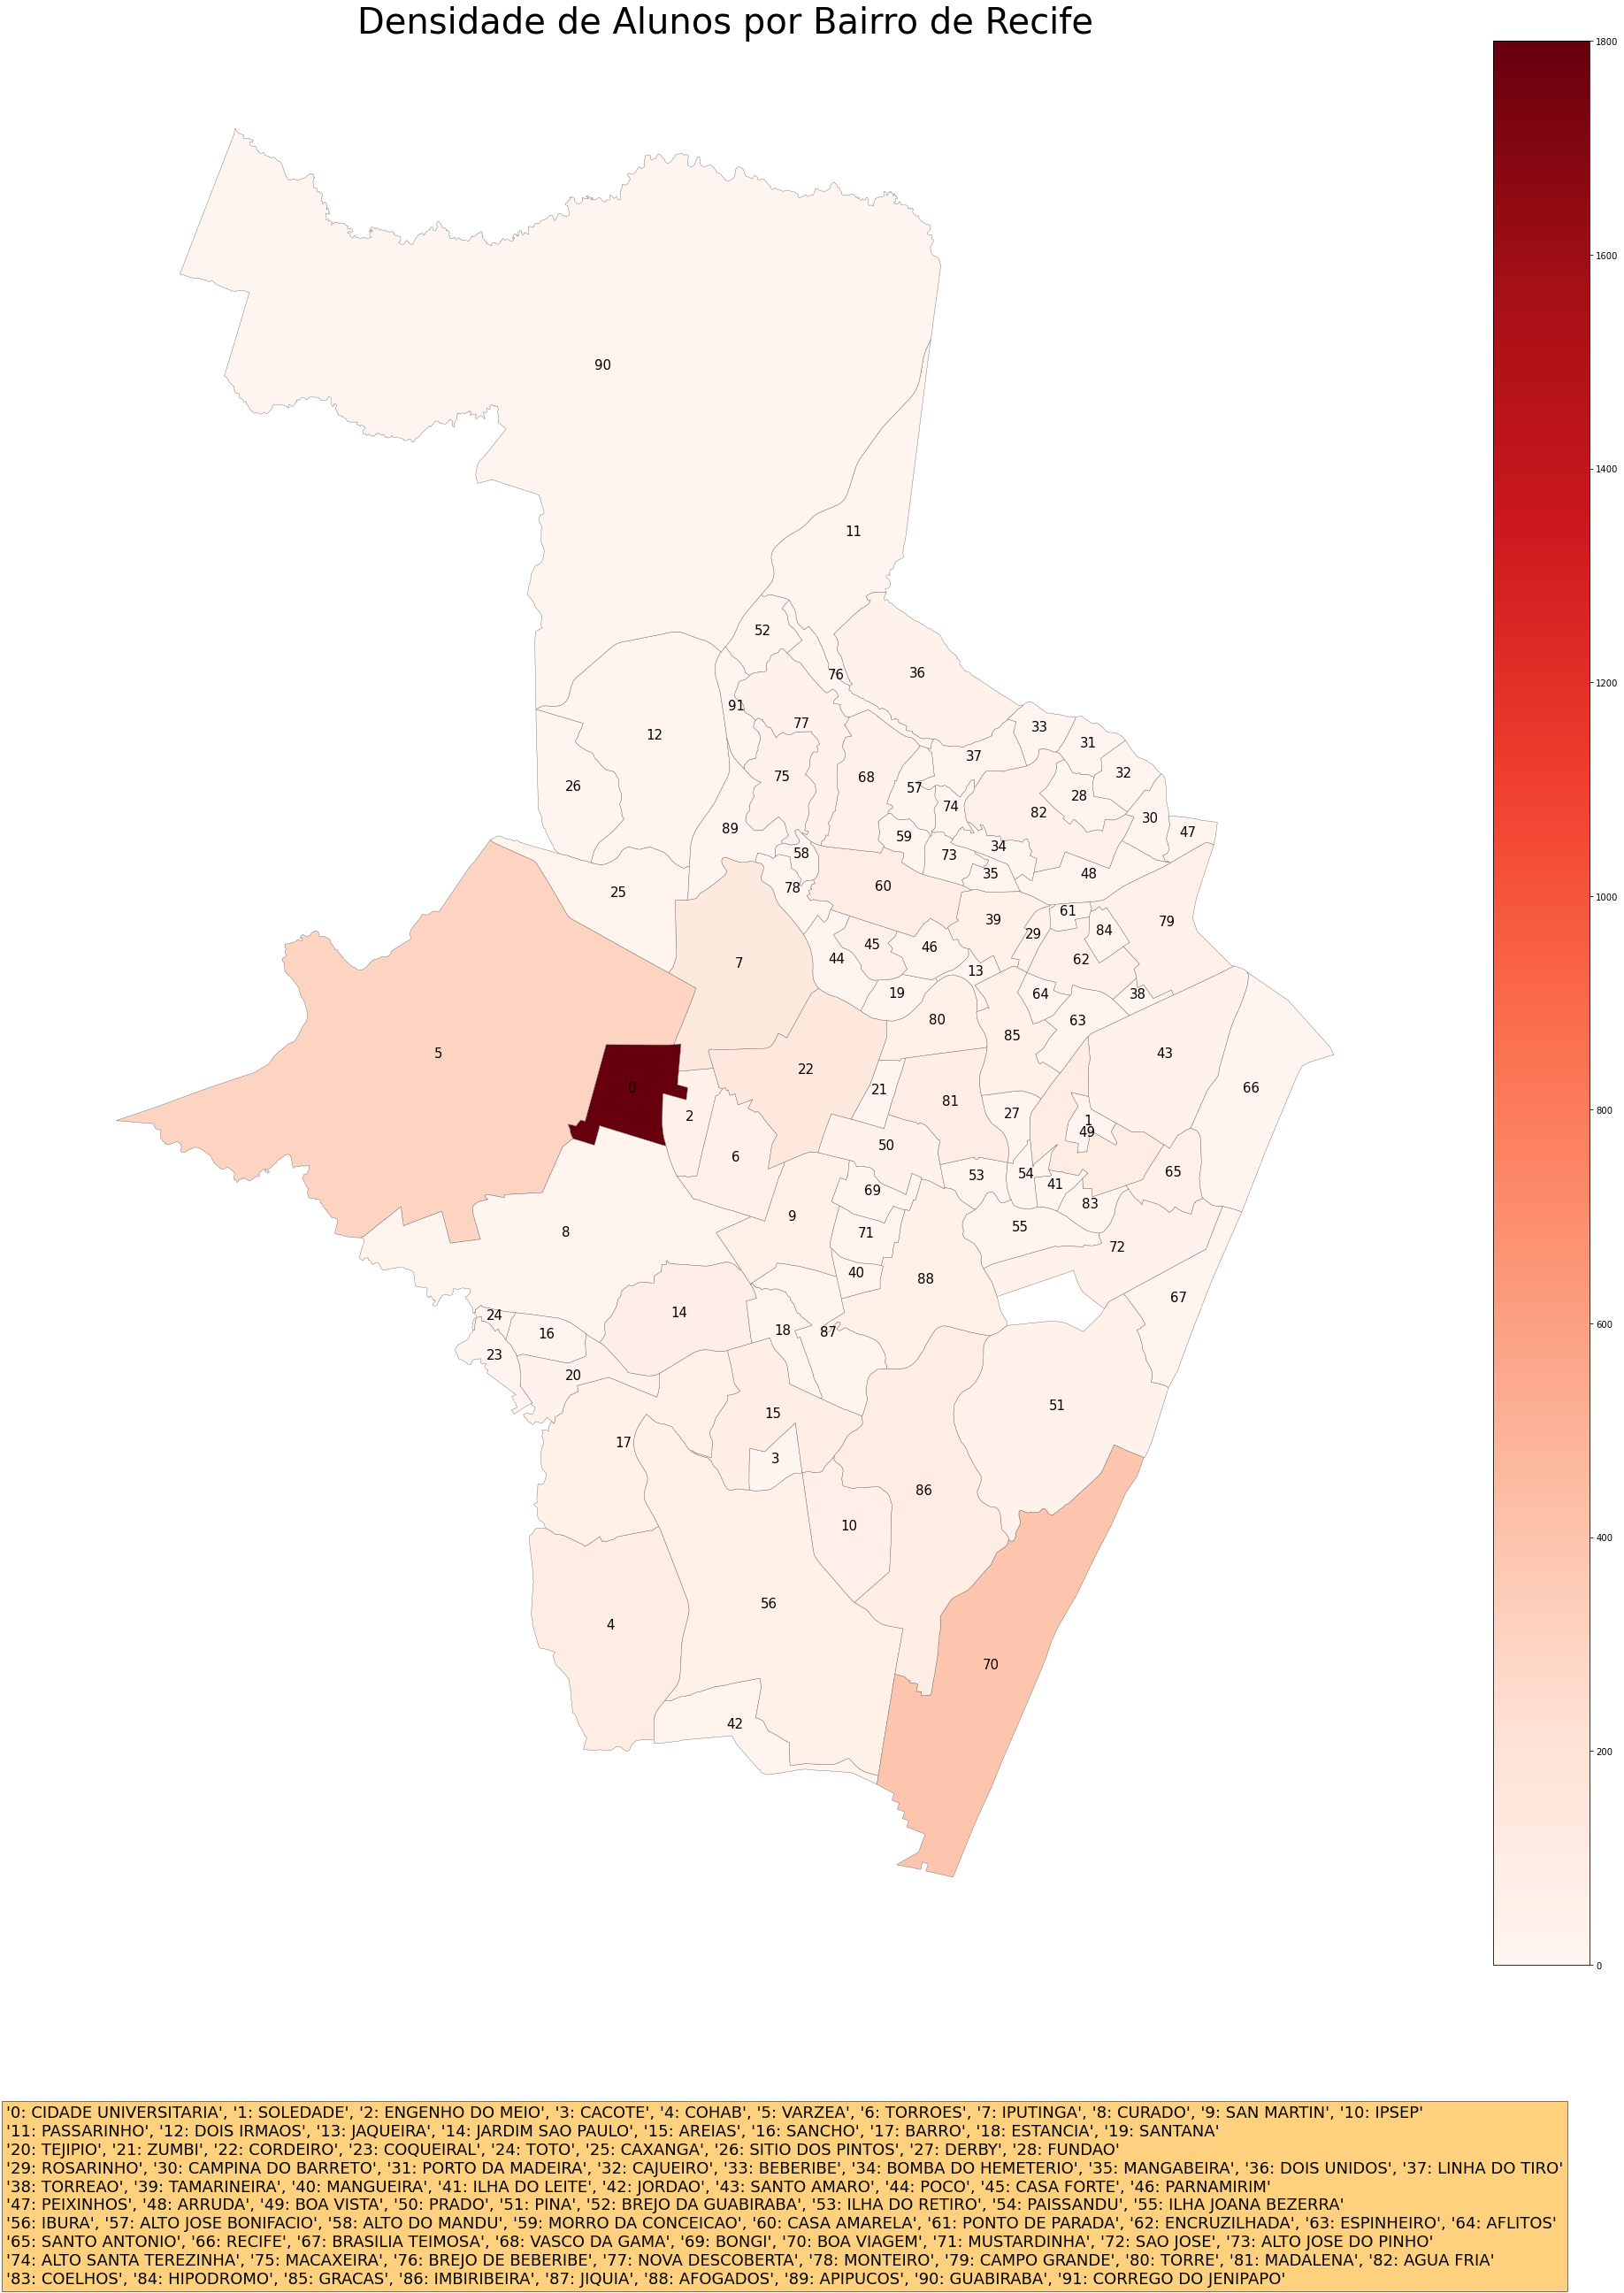

In [26]:
fig1, ax1 = plt.subplots(1, figsize=(40, 40))
plt.xticks(rotation=90)
plt.title(label = "Densidade de Alunos por Bairro de Recife",fontsize=40)
plt.figtext(0.2, 0, relacao, ha="left", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
map_and_stats_rec.plot(column="Alunos", cmap="Reds", linewidth=0.4, ax=ax1, edgecolor=".4")
map_and_stats_rec.apply(lambda x: ax1.annotate(text=x['Indice'], xy=x.geometry.centroid.coords[0], ha='center',fontsize=15), axis=1,)
bar_info = plt.cm.ScalarMappable(cmap="Reds", norm=plt.Normalize(vmin=0, vmax=1800))
bar_info._A = []
cbar = fig1.colorbar(bar_info)
ax1.axis("off")

